# Trees

Trees are data structures that are relatively similar to linked lists, but each node may point to multiple "children." Like linked lists, there is no memory of previous nodes as you move through the data structure. Nodes with no children are referred to as "leaves," with the topmost node called the "root." Trees are also recursively structured: each child can act as the root of its own subtree.

In [49]:
from IPython.display import Image

We start by creating a class that emulates a single node of the tree. It contains two variables: its own value and a list of its children. It is optional to give the children when creating a node and the default is no children.

In [1]:
class Node:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children
        
    """The following code allows us to easily print
    any given tree. Trees are best vizualized as
    vertical structures, with each child in the row
    below its parent and children of equal depth along
    the same row. Programming that representation in a
    robust way is rather obnoxious. Therefore, for the
    purposes of this notebook, we will represent equal depth
    levels with equal amounts of identation."""
    def __str__(self, level=0):
        ret = "\t"*level+repr(self.value)+"\n"
        for child in self.children:
            ret += child.__str__(level+1)
        return ret

Let's start with a relatively simple tree. There are 7 nodes: 1 root, 3 children, and 3 "grandchildren."

In [27]:
root = Node(1)
child1 = Node(2)
child2 = Node(3)
child3 = Node(4)
grandchild1 = Node(5)
grandchild2 = Node(6)
grandchild3 = Node(7)

root.children = [child1, child2, child3] #set root's children
child1.children = [grandchild1, grandchild2] #set child1's children
child3.children = [grandchild3] #set child3's children
print(root)

1
	2
		5
		6
	3
	4
		7



As before, we are not limited to trees of integers. Trees can hold anything, from ints to strings to linked lists to other trees <sub>(it's treetles all the way down <sub>(sorry)</sub>)</sub>. Let's create a tree that conceptually represents some of the fields of astronomy. I've tried to include a wide variety of ways that a tree can be modified so this is in no way the most simple approach to building this tree.

In [146]:
#We start towards the bottom of the tree, defining some subfields of stars
starSub = [Node("MS Stars"), Node("Giants"), Node("Supergiants")]

#We define our subfields and set one subsubfield
subfields = [Node("Stars", starSub), Node("Compact Objects"), Node("Planets")]

#Now we finally create our root, setting the subfields as its children
field = Node("Astronomy", children=subfields)

#Let's set the children of the second subfield (compact objects)
#We can set subsubsubfields in the process by defining the children of "black holes"
subfields[1].children = [Node("Neutron Stars"), 
                         Node("Black holes", 
                              [Node("Supermassive black holes"), 
                               Node("Stellar mass black holes")])]

#In case we forget something, we can always append to our list of children later
subfields[1].children.append(Node("White dwarfs"))

#finally, let's set our last subsubfield by accessing it from the root
field.children[2].children = [Node("Exoplanets"), Node("Planets")]

print(field)

'Astronomy'
	'Stars'
		'MS Stars'
		'Giants'
		'Supergiants'
	'Compact Objects'
		'Neutron Stars'
		'Black holes'
			'Supermassive black holes'
			'Stellar mass black holes'
		'White dwarfs'
	'Planets'
		'Exoplanets'
		'Planets'



Remember that each child functions as its own tree! We can treat any node as the root of a tree.

In [21]:
print(subfields[1])

'Compact Objects'
	'Neutron Stars'
	'Black holes'
		'Supermassive black holes'
		'Stellar mass black holes'
	'White dwarfs'



One of the most important types of trees is a "binary tree." Each node on a binary tree has at most **two** children. If these children exist, they are typically referred to as the "left" and "right" children. We will only make a small change to our class for convenience.

In [40]:
class binNode:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
    def __str__(self, level=0):
        ret = "\t"*level+repr(self.value)+"\n"
        for child in [self.left, self.right]:
            if child:
                ret += child.__str__(level+1)
        return ret

### Information encoding

One application of binary trees is in the encoding of information. An excellent example of this is Morse Code! You can imagine whether you have a "dot" or a "dash" as going left or right in a binary tree. It is possible to stop at any node and check the value there to get the corresponding letter. Less common letters are further down the tree so the most common letters are encoded the most efficiently.

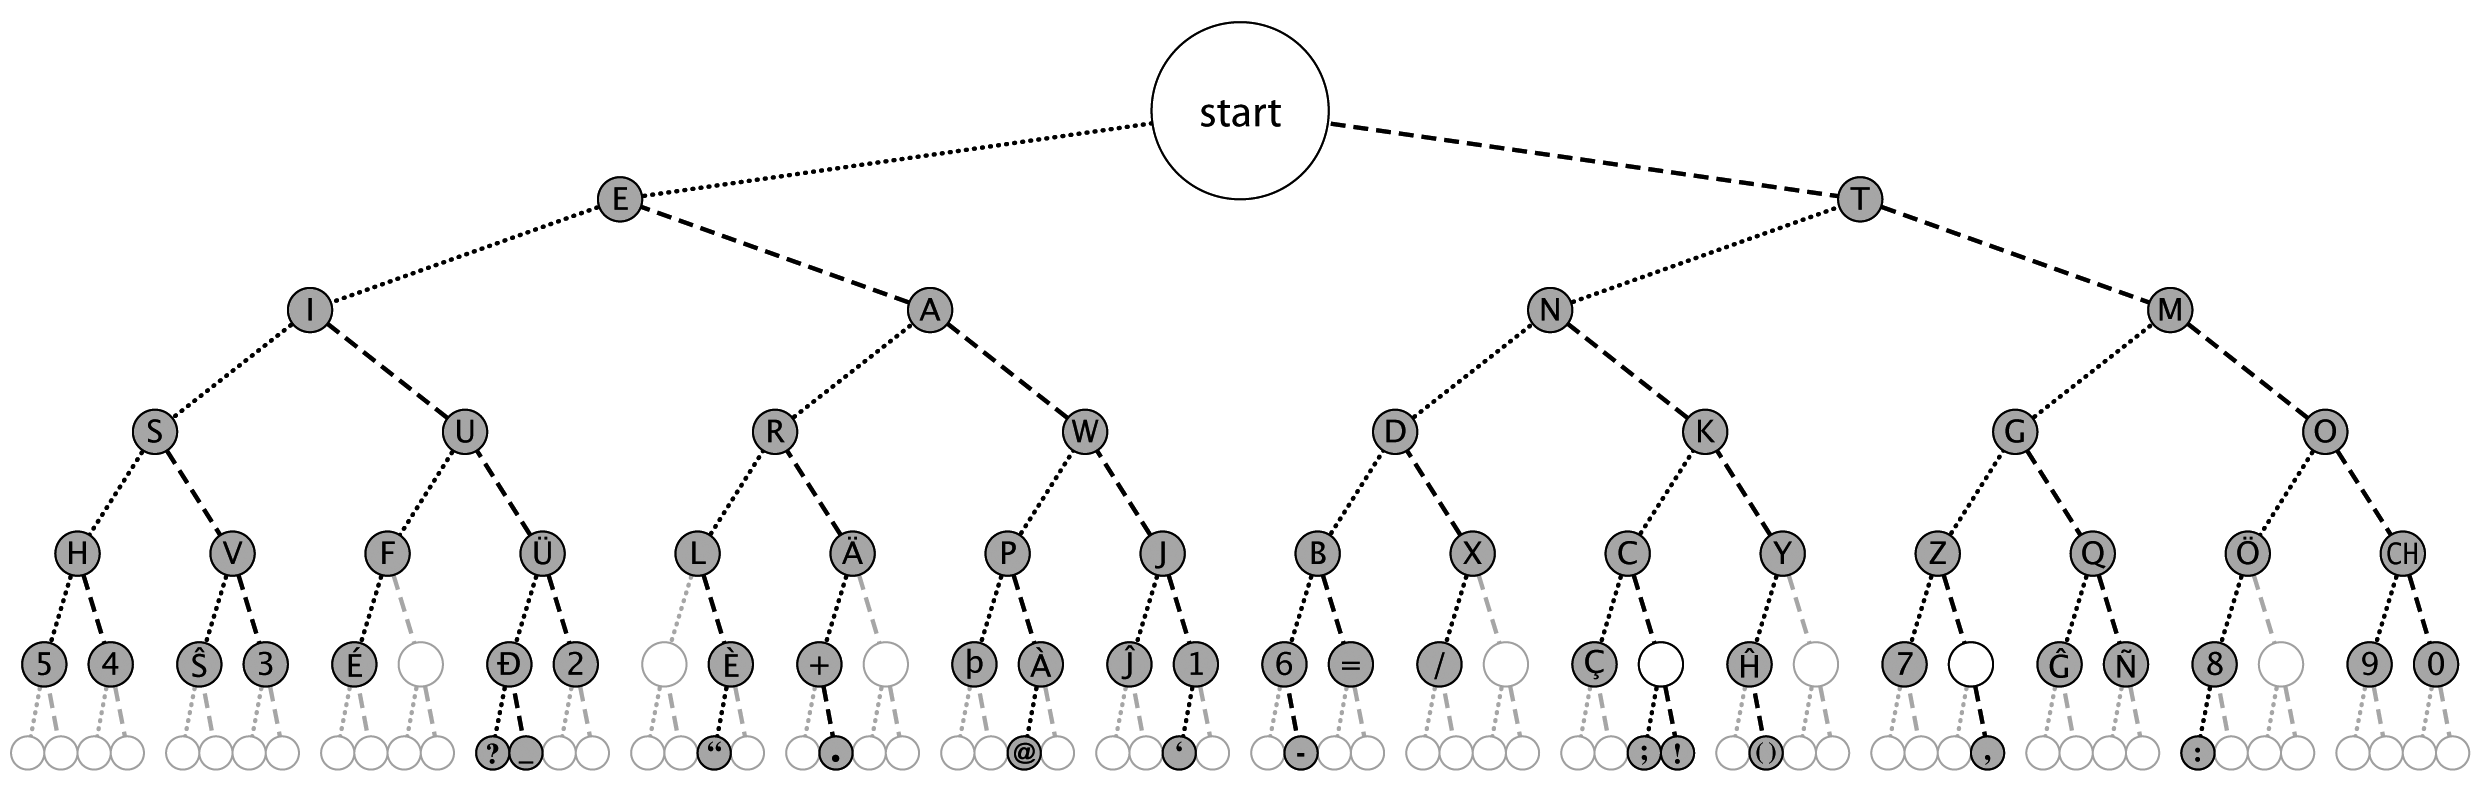

In [52]:
Image(filename="Morse_code_tree3.png")

Let's encode this ourselves!

In [54]:
mcRoot = binNode("", binNode("E"), binNode("T"))
mcRoot.left.left = binNode("I", binNode("S", binNode("H"), binNode("V")), 
                           binNode("U", binNode("F")))
mcRoot.left.right = binNode("A", binNode("R", binNode("L")), 
                            binNode("W", binNode("P"), binNode("J")))
mcRoot.right.left = binNode("N", binNode("D", binNode("B"), binNode("X")), 
                            binNode("K", binNode("C"), binNode("Y")))
mcRoot.right.right = binNode("M", binNode("G", binNode("Z"), binNode("Q")),
                            binNode("O"))
print(mcRoot)

''
	'E'
		'I'
			'S'
				'H'
				'V'
			'U'
				'F'
		'A'
			'R'
				'L'
			'W'
				'P'
				'J'
	'T'
		'N'
			'D'
				'B'
				'X'
			'K'
				'C'
				'Y'
		'M'
			'G'
				'Z'
				'Q'
			'O'



It's now relatively easy to create a function that can decode Morse Code! Notice that this is significantly cleaner and faster than the brute force solution of explicitly writing every letter's encoding.

In [147]:
def mcDecode(message):
    
    #Separate the letters
    letters = message.split()
    
    res = "" #result string
    
    #Loop over all the letters
    for chars in letters:
        if chars=='/': #space character
            res += " "
        else:
            current = mcRoot #start at the root
            
            #for each . or -, go left for .'s and right for -'s.
            #stop when you reach the final . or -
            for c in chars:
                if c == '.':
                    current = current.left
                else:
                    current = current.right
            
            #Add whatever letter we ended at to our string
            res += current.value
    
    return res


In [97]:
print(mcDecode(".- .--. ..."))

APS


In [96]:
mcDecode(".... . .-.. .-.. --- / .-- --- .-. .-.. -..")

'HELLO WORLD'

In [95]:
mcDecode("""-.-. .- .-.. .-.. .. -. --. / 
                .- .-.. .-.. / - .... .. ... / 
                .. ... / --- ..- .-. / 
                .-.. .- ... - / -.-. .-. -.-- / 
                -... . ..-. --- .-. . / --- ..- .-. / 
                . - . .-. -. .- .-.. / ... .. .-.. . -. -.-. .""")

'CALLING ALL THIS IS OUR LAST CRY BEFORE OUR ETERNAL SILENCE'

One very important subtype of binary trees are *binary search trees,* or BSTs. BSTs are binary trees with a simple but significant feature. For any given node, the value of every successor on its left side (so its left child and all its left child's children) is less than its own value. Conversely, the value of every successor on the right side is greater. We are not necessarily restrained to numbers, this is sometimes down with alphabetical ordering.

Consider the following example BST.

In [148]:
tBST = binNode(15, left = binNode(5), right = binNode(25)) # 5 < 15 < 25
tBST.left.left = binNode(1) #1 < 5 < 15
tBST.left.right = binNode(9) #5 < 9 < 15
tBST.right.left = binNode(20) #15 < 20 < 25
tBST.right.right = binNode(30) #15 < 25 < 30
tBST.right.right.right = binNode(35) #15 < 25 < 30 < 35
print(tBST)

15
	5
		1
		9
	25
		20
		30
			35



BSTs are nice because they have a very predictable structure. It is therefore quite easy to navigate a BST to find where a number is or should be. Two of the most common functions implemented for BSTs are *search* and *insert*.

Let's start with search which simply tells us if it's True or False that a tree contains a number.

In [152]:
def search(val, root):
    current = root
    
    while current: #go until we go past a leaf
        
        #we found it!
        if current.value == val:
            return True
        
        #keep looking either left or right, depending on the value
        else:
            if val < current.value:
                current = current.left
            else:
                current = current.right
    
    #We never found it :(
    return False

In [154]:
print(search(1, tBST)) #True!
print(search(36, tBST)) #False!
print(search(20, tBST.left)) #20 is in the BST, but on the right side. False!
print(search(35, tBST.right)) #35 is in the subtree tBST.right. True!

True
False
False
True


Insert adds a new leaf to the BST. It acts almost identical to search, in that we find where the node *should be* and then add it there. It is easy to think of the process recursively.

In [107]:
def insert(val, root):
    
    #go left
    if val < root.value:
        
        #nothing there, add the new node
        if root.left is None:
            root.left = binNode(val)
            
        #otherwise add the value to the left subtree    
        else:
            insert(val, root.left)
    
    #same as the previous section due to symmetry
    if val > root.value:
        if root.right is None:
            root.right = binNode(val)
        else:
            insert(val, root.right)

In [155]:
print(search(17,tBST))
insert(17,tBST)
print(tBST)
print(search(17, tBST))

insert(7,tBST)
print(tBST)

False
15
	5
		1
		9
	25
		20
			17
		30
			35

True
15
	5
		1
		9
			7
	25
		20
			17
		30
			35



A critical aspect of trees is "tree traversal," in which we explore entire trees. If we want to write down every node value in a tree, where do we start? Which nodes do we write down first?

That question can be answered in one of three ways: pre-order traversal, in-order traversal, and post-order traversal. Eath method is recursive. For a given node and its subtrees, we can preform
* Pre-order traversal - Write down the value of the node, then do a pre-order traversal of its left child, then its right child.
* In-order traversal - Do an in-order traversal the left child, write down the value of the node, then do an in-order traversal of the right child.
* Post-order traversal - Do a post-order traversal of the left child, then the right child, then write down dawn the value of the node.



In [122]:
def preOrder(root):
    if root: #center, left, right
        return [root.value] + preOrder(root.left) + preOrder(root.right)
    else: #reached the bottom of the tree
        return []

def inOrder(root):
    if root: #left, center, right
        return inOrder(root.left) + [root.value] + inOrder(root.right)
    else: #reached the bottom of the tree
        return []

def postOrder(root):
    if root: #left, right, center
        return postOrder(root.left) + postOrder(root.right) + [root.value]
    else: #reached the bottom of the tree
        return []

In [123]:
print(preOrder(tBST))
print(inOrder(tBST)) 
print(postOrder(tBST))

[15, 5, 1, 9, 7, 25, 20, 17, 30, 35]
[1, 5, 7, 9, 15, 17, 20, 25, 30, 35]
[1, 7, 9, 5, 17, 20, 35, 30, 25, 15]


Note that the in-order traversal returns the numbers in ascending order. **This is always the case for a binary search tree.**

Tree traversals are important in a number of situations, but they are necessary to properly **delete** a node from a tree, the final function we'll consider. When deleting a node from a tree, we have to consider three cases. The first two are simple, the third is more complicated if we wish to maintain a well balanced BST.

1. If the node has zero children, it is a leaf and it can be deleted with no consequence.
2. If the node has one child, that child should replace the deleted parent.
3. If the node has two children, it needs to be replaced by its **in-order successor**, aka the node that comes directly after it in an in-order traversal. This is always the smallest value in the right subtree.

In [142]:
#This function deletes a node from a given tree.
#It returns the root of the tree and is implemented
#recursively.
def delete(val, root):
    
    #delete from left subtree
    if val < root.value:
        root.left = delete(val, root.left)
    
    #delete from right subtree
    elif val > root.value:
        root.right = delete(val, root.right)
    
    #We've found the value
    elif val == root.value:
        
        #zero children or one child
        #root.left and root.right are both None if zero children
        if not root.right:
            return root.left
        elif not root.left:
            return root.right
        
        #node with two children
        successor = inOrder(root.right)[0]
        root.value = successor
        
        #remember to remove the successor from the subtree
        root.right = delete(successor,root.right)
    
    #note that nothing happens if the value is not in the tree
    return root

In [145]:
"""First we build a tree to work with"""
tBST = binNode(15, left = binNode(5), right = binNode(25))
tBST.left.left = binNode(1)
tBST.left.right = binNode(9)
tBST.right.left = binNode(20)
tBST.right.right = binNode(30)
tBST.right.right.right = binNode(35)
insert(17,tBST)
insert(7, tBST)

print(tBST)
#Let's delete 1, a leaf
tBST = delete(1, tBST)
print(tBST)
#The only change is that 1 is gone

#Now let's delete something with one child
tBST = delete(5, tBST)
print(tBST)
#5 has been replaced by its one child, 9

#Now let's delete a node with two children
tBST = delete(25, tBST)
print(tBST)
#25's in-order successor (the minimum value of it's right child)
#was 30, which has now replaced 25

#We can even delete the root
tBST = delete(15, tBST)
print(tBST)
#15 has been replaced by its in-order successor, 17

15
	5
		1
		9
			7
	25
		20
			17
		30
			35

15
	5
		9
			7
	25
		20
			17
		30
			35

15
	9
		7
	25
		20
			17
		30
			35

15
	9
		7
	30
		20
			17
		35

17
	9
		7
	30
		20
		35

